# Boston DataSet - KNN Regression with Hyperparameter Tuning [K and P]

1. Data Gathering
2. EDA
3. Hyper Paramenter Tuning
4. Model Building
5. Prediction
6. Evaluation

#### Using normal process [k=4,p=1]
- Test Data Evaluation
 - MSE:  47.95659926470588
 - MAE:  4.889950980392155
 - RMSE:  6.925070343664812
 - R2 Score:  0.5562777768019862
 
 
- Train Data Evaluation
 - MSE:  18.464637995049507
 - MAE:  2.823638613861386
 - RMSE:  4.29704991768184
 - R2 Score:  0.7643013891797428
 
#### Using GridSerchCV process [k=3,p=1]
- Test Data Evaluation
 - MSE:  46.13502178649236
 - MAE:  4.715359477124182
 - RMSE:  6.792276627647932
 - R2 Score:  0.5731320663211179

- Train Data Evaluation
 - MSE:  15.727766776677667
 - MAE:  2.6551155115511547
 - RMSE:  3.9658248545135812
 - R2 Score:  0.7992371807364003

#### Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import pickle
import json

from sklearn.datasets import load_boston

#### Data Gathering

In [2]:
data = load_boston()
data.keys()

C:\Users\saura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df['PRICE'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Hyper Parameter Tuning

In [6]:
x = df.drop('PRICE',axis=1)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y = df['PRICE']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


[0.86471549649063, 0.7992371807364003, 0.7643013891797428, 0.7422557896293066, 0.7223302647604876, 0.7031404007318792, 0.6745928397961465, 0.6512288249002809, 0.635399458760997, 0.6235208659807967, 0.6112640316593858, 0.5918962679041533, 0.5747615273240945, 0.5624311559158964, 0.5528349745462495, 0.5372631173246996, 0.5242122707919814, 0.5140538989135978, 0.5051775883801939]
[0.6048280204447845, 0.5731320663211179, 0.5562777768019862, 0.5425600777985016, 0.5516630089305676, 0.5661842993619015, 0.5418456953585696, 0.5190362618221159, 0.5212609675054742, 0.503353698238757, 0.4977846832940064, 0.502347843236455, 0.4964495247232942, 0.48276956559020046, 0.4686399189248768, 0.46992539588971216, 0.4764998676587855, 0.478111960305418, 0.4653502700558697]


Text(0.5, 1.0, 'Comparision between train and test score')

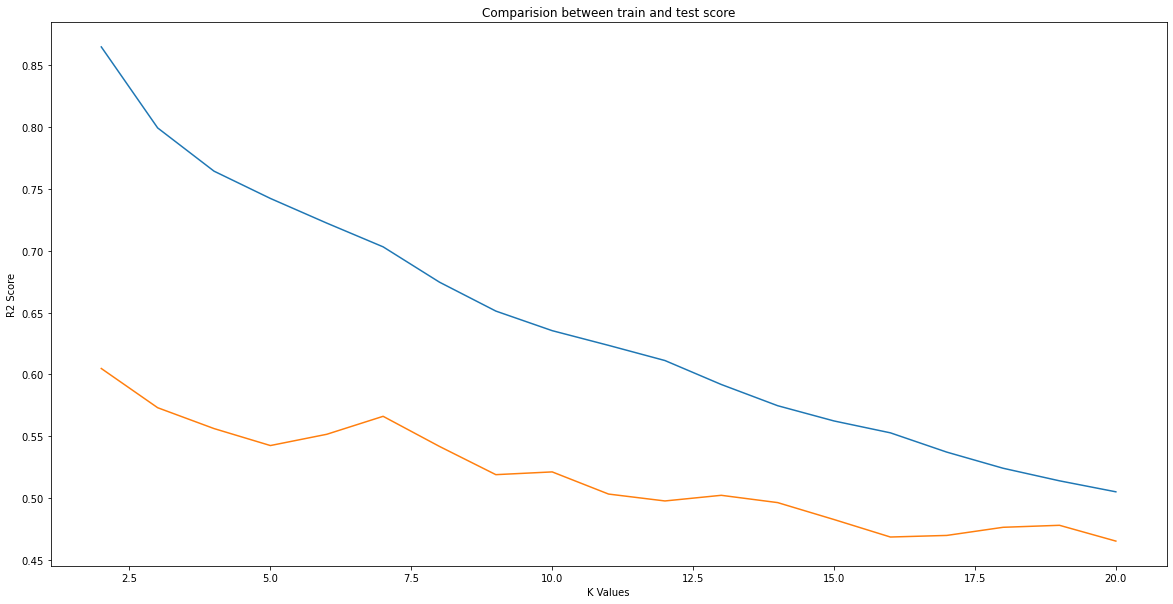

In [9]:
plt.figure(figsize = (20,10))
r2_train_list = []
r2_test_list = []


k_value = range(2,21)
p_value = [1,2]

for k in k_value:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    #train score
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    #test score
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
    
print(r2_train_list)
print(r2_test_list)

plt.plot(k_value,r2_train_list)
plt.plot(k_value,r2_test_list)

plt.xlabel("K Values")
plt.ylabel("R2 Score")
plt.title("Comparision between train and test score")

Text(0.5, 1.0, 'Comparision between train and test score for p=2')

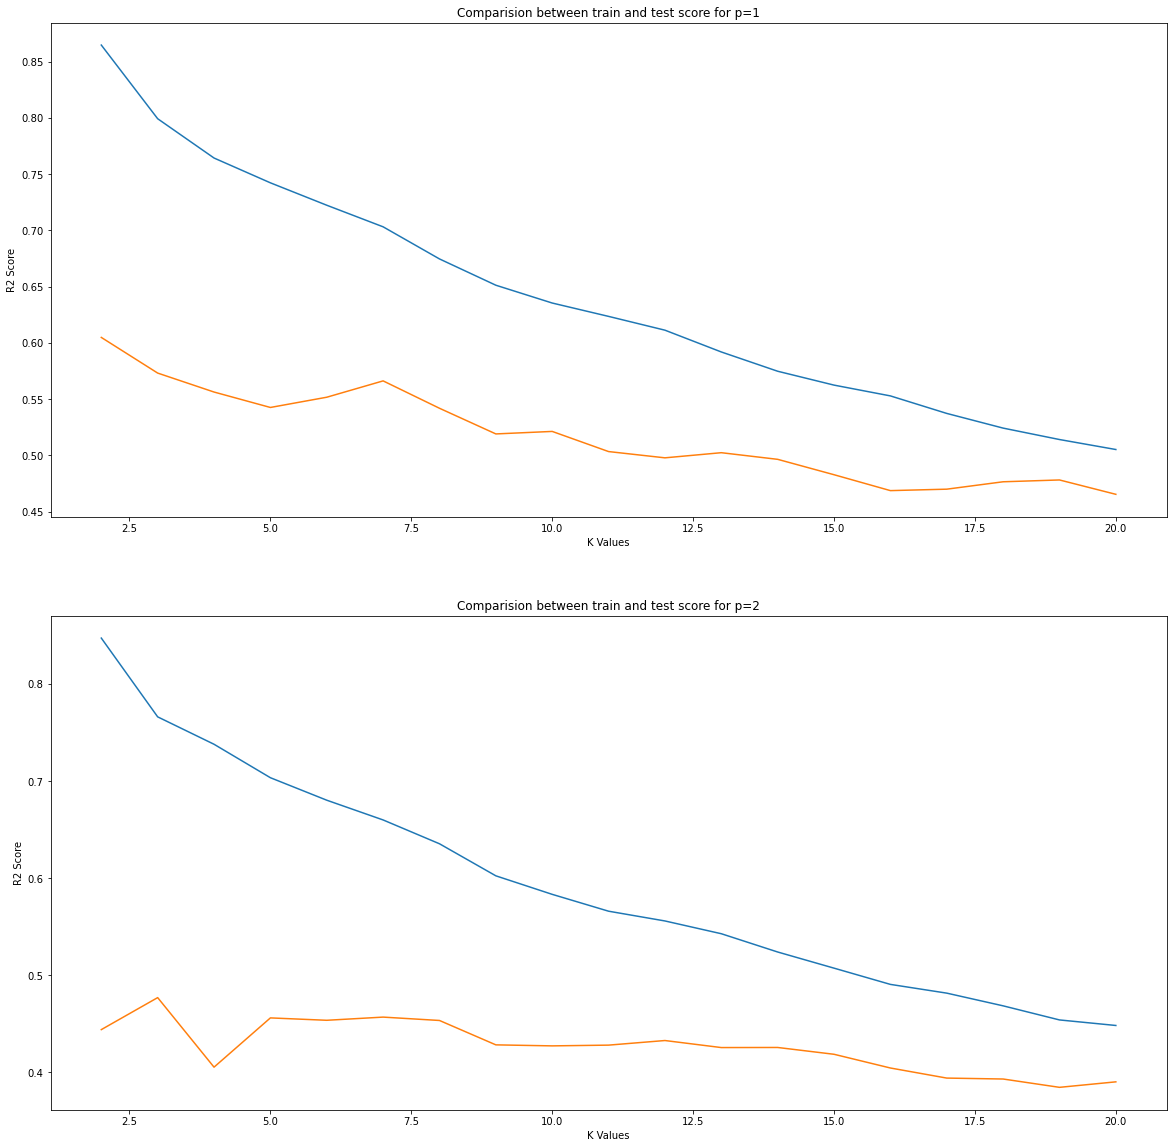

In [10]:
fig , axs = plt.subplots(2,figsize = (20,20))

k_value = range(2,21)

r2_train_list_1 = []
r2_test_list_1 = []

for k in k_value:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    #train score
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list_1.append(r2_train)
    #test score
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list_1.append(r2_test)
    
# print(r2_train_list_1)
# print(r2_test_list_1)

r2_train_list_2 = []
r2_test_list_2 = []

for k in k_value:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(x_train,y_train)
    #train score
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list_2.append(r2_train)
    #test score
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list_2.append(r2_test)
    
# print(r2_train_list_2)
# print(r2_test_list_2)

axs[0].plot(k_value,r2_train_list_1)
axs[0].plot(k_value,r2_test_list_1)
axs[0].set_xlabel("K Values")
axs[0].set_ylabel("R2 Score")
axs[0].set_title("Comparision between train and test score for p=1")

axs[1].plot(k_value,r2_train_list_2)
axs[1].plot(k_value,r2_test_list_2)
axs[1].set_xlabel("K Values")
axs[1].set_ylabel("R2 Score")
axs[1].set_title("Comparision between train and test score for p=2")

[(1, 2, 0.26, 0.86, 0.6), (1, 3, 0.23, 0.8, 0.57), (1, 4, 0.2, 0.76, 0.56), (1, 5, 0.2, 0.74, 0.54), (1, 6, 0.17, 0.72, 0.55), (1, 7, 0.13, 0.7, 0.57), (1, 8, 0.13, 0.67, 0.54), (1, 9, 0.13, 0.65, 0.52), (1, 10, 0.12, 0.64, 0.52), (1, 11, 0.12, 0.62, 0.5), (1, 12, 0.11, 0.61, 0.5), (1, 13, 0.09, 0.59, 0.5), (1, 14, 0.07, 0.57, 0.5), (1, 15, 0.08, 0.56, 0.48), (1, 16, 0.08, 0.55, 0.47), (1, 17, 0.07, 0.54, 0.47), (1, 18, 0.04, 0.52, 0.48), (1, 19, 0.03, 0.51, 0.48), (1, 20, 0.04, 0.51, 0.47)]

[(1, 19, 0.03, 0.51, 0.48), (1, 18, 0.04, 0.52, 0.48), (1, 20, 0.04, 0.51, 0.47), (1, 14, 0.07, 0.57, 0.5), (1, 17, 0.07, 0.54, 0.47), (1, 15, 0.08, 0.56, 0.48), (1, 16, 0.08, 0.55, 0.47), (1, 13, 0.09, 0.59, 0.5), (1, 12, 0.11, 0.61, 0.5), (1, 10, 0.12, 0.64, 0.52), (1, 11, 0.12, 0.62, 0.5), (1, 7, 0.13, 0.7, 0.57), (1, 8, 0.13, 0.67, 0.54), (1, 9, 0.13, 0.65, 0.52), (1, 6, 0.17, 0.72, 0.55), (1, 4, 0.2, 0.76, 0.56), (1, 5, 0.2, 0.74, 0.54), (1, 3, 0.23, 0.8, 0.57), (1, 2, 0.26, 0.86, 0.6)]

[(1,

Text(0.5, 1.0, 'Comparision between train and test score')

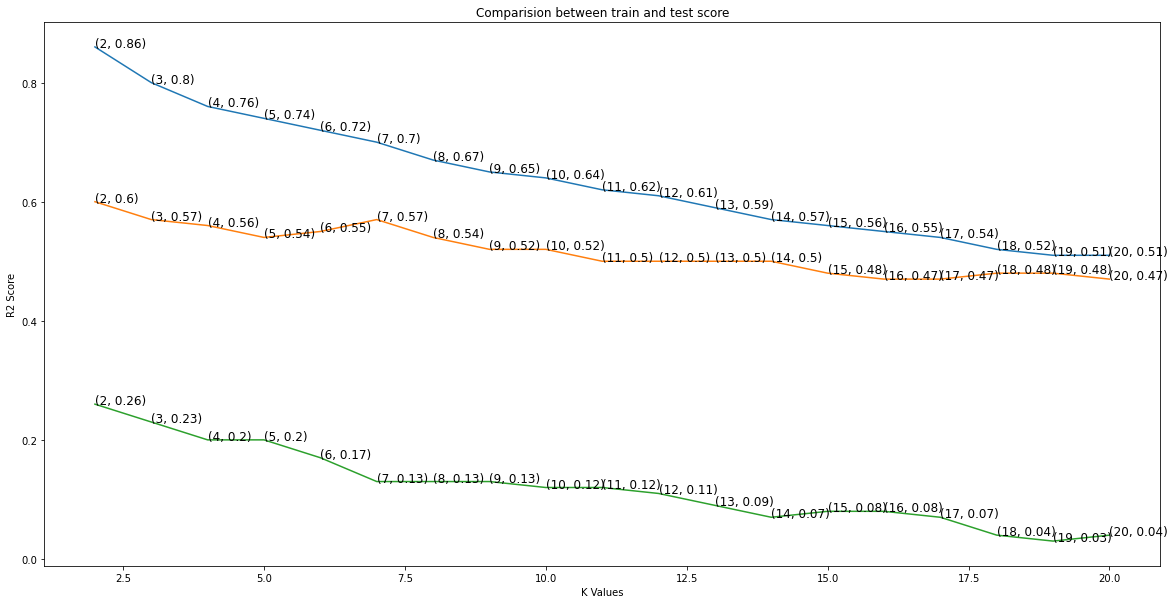

In [11]:
plt.figure(figsize = (20,10))
r2_train_list = []
r2_test_list = []

diff_list = []

HP_data = []

k_value = range(2,21)
p_value = 1

for k in k_value:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=p_value)
    knn_reg.fit(x_train,y_train)
    #train score
    r2_train = round(knn_reg.score(x_train,y_train),2)
    r2_train_list.append(r2_train)

    #test score
    r2_test = round(knn_reg.score(x_test,y_test),2)
    r2_test_list.append(r2_test)
    
    diff=round(abs(r2_train-r2_test),2)
    diff_list.append(diff)
    HP_data.append((p_value,k,diff,r2_train,r2_test))
    
print(HP_data,end="\n\n")
HP_data=sorted(HP_data,key = lambda x:x[2])
print(HP_data,end="\n\n")
HP_data=sorted(HP_data,key = lambda x:x[3],reverse=True)
print(HP_data)

plt.plot(k_value,r2_train_list)
for i in range(len(k_value)):
    plt.text(k_value[i],r2_train_list[i],(k_value[i],r2_train_list[i]),size=12)
    
plt.plot(k_value,r2_test_list)
for i in range(len(k_value)):
    plt.text(k_value[i],r2_test_list[i],(k_value[i],r2_test_list[i]),size=12)
    
plt.plot(k_value,diff_list)
for i in range(len(k_value)):
    plt.text(k_value[i],diff_list[i],(k_value[i],diff_list[i]),size=12)

plt.xlabel("K Values")
plt.ylabel("R2 Score")
plt.title("Comparision between train and test score")

[(1, 2, 0.26, 0.86, 0.6), (1, 3, 0.23, 0.8, 0.57), (1, 4, 0.2, 0.76, 0.56), (1, 5, 0.2, 0.74, 0.54), (1, 6, 0.17, 0.72, 0.55), (1, 7, 0.13, 0.7, 0.57), (1, 8, 0.13, 0.67, 0.54), (1, 9, 0.13, 0.65, 0.52), (1, 10, 0.12, 0.64, 0.52), (1, 11, 0.12, 0.62, 0.5), (1, 12, 0.11, 0.61, 0.5), (1, 13, 0.09, 0.59, 0.5), (1, 14, 0.07, 0.57, 0.5), (1, 15, 0.08, 0.56, 0.48), (1, 16, 0.08, 0.55, 0.47), (1, 17, 0.07, 0.54, 0.47), (1, 18, 0.04, 0.52, 0.48), (1, 19, 0.03, 0.51, 0.48), (1, 20, 0.04, 0.51, 0.47)]

[(2, 2, 0.41, 0.85, 0.44), (2, 3, 0.29, 0.77, 0.48), (2, 4, 0.33, 0.74, 0.41), (2, 5, 0.24, 0.7, 0.46), (2, 6, 0.23, 0.68, 0.45), (2, 7, 0.2, 0.66, 0.46), (2, 8, 0.19, 0.64, 0.45), (2, 9, 0.17, 0.6, 0.43), (2, 10, 0.15, 0.58, 0.43), (2, 11, 0.14, 0.57, 0.43), (2, 12, 0.13, 0.56, 0.43), (2, 13, 0.11, 0.54, 0.43), (2, 14, 0.09, 0.52, 0.43), (2, 15, 0.09, 0.51, 0.42), (2, 16, 0.09, 0.49, 0.4), (2, 17, 0.09, 0.48, 0.39), (2, 18, 0.08, 0.47, 0.39), (2, 20, 0.06, 0.45, 0.39), (2, 19, 0.07, 0.45, 0.38)]


Text(0.5, 1.0, 'Comparision between train and test score')

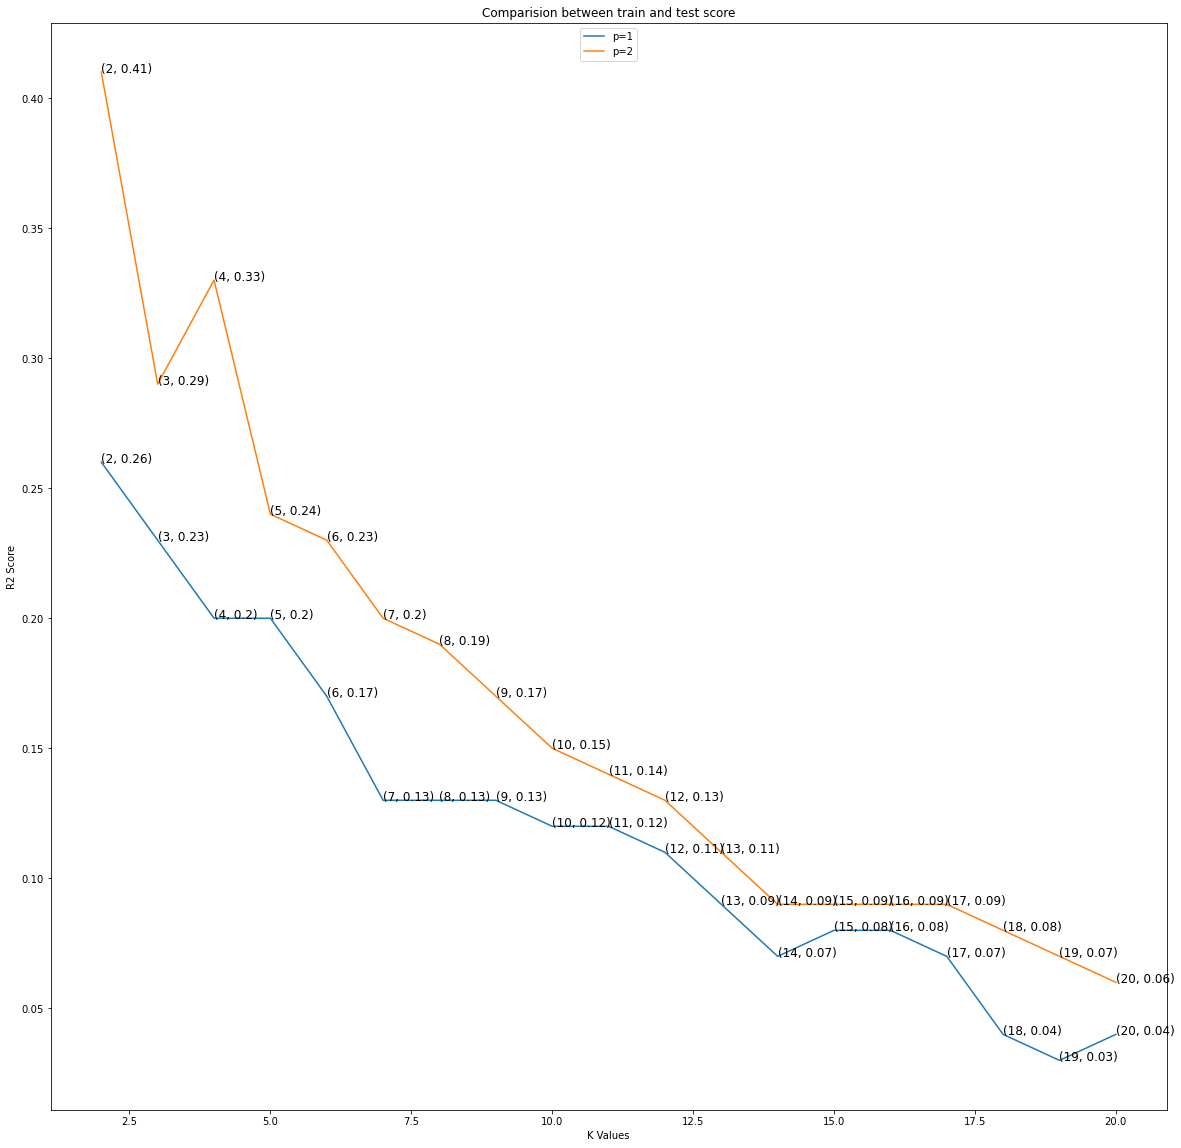

In [12]:
plt.figure(figsize = (20,20))


k_value = range(2,21)
p_values = [1,2]

for p_value in p_values:
    r2_train_list = []
    r2_test_list = []
    
    diff_list = []
    
    HP_data = []
    
    for k in k_value:
        knn_reg = KNeighborsRegressor(n_neighbors=k,p=p_value)
        knn_reg.fit(x_train,y_train)
        #train score
        r2_train = round(knn_reg.score(x_train,y_train),2)
        r2_train_list.append(r2_train)
    
        #test score
        r2_test = round(knn_reg.score(x_test,y_test),2)
        r2_test_list.append(r2_test)
        
        diff=round(abs(r2_train-r2_test),2)
        diff_list.append(diff)
        HP_data.append((p_value,k,diff,r2_train,r2_test))
        
    #print(HP_data,end="\n\n")
    HP_data=sorted(HP_data,key = lambda x:x[2])
    #print(HP_data,end="\n\n")
    HP_data=sorted(HP_data,key = lambda x:x[3],reverse=True)
    print(HP_data,end="\n\n")
        
    plt.plot(k_value,diff_list,label=f"p={p_value}")
    for i in range(len(k_value)):
        plt.text(k_value[i],diff_list[i],(k_value[i],diff_list[i]),size=12)

leg = plt.legend(loc='upper center')
plt.xlabel("K Values")
plt.ylabel("R2 Score")
plt.title("Comparision between train and test score")

So it looks like for p=1 and k=4 the difference between train and test score is 0.2
Train Score = 0.76
Test Score = 0.56

### K=4 and P=1 are best choice 

#### Model Building

In [13]:
knn_reg = KNeighborsRegressor(n_neighbors=4,p=1)
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4, p=1)

#### Prediction

In [14]:
#test data

y_test_pred = knn_reg.predict(x_test)

print("Ya -- Yp")
for i in range(15,21):
    print(y_test.iloc[i],y_test_pred[i])

Ya -- Yp
18.6 14.524999999999999
28.7 21.775
23.7 22.125000000000004
13.1 8.725
25.0 35.55
11.9 22.15


In [15]:
#test data

y_train_pred = knn_reg.predict(x_train)

print("Ya -- Yp")
for i in range(15,21):
    print(y_train.iloc[i],y_train_pred[i])

Ya -- Yp
13.6 14.8
14.1 14.399999999999999
44.8 42.05
21.2 20.3
21.4 16.575
22.0 21.799999999999997


#### Evaluation

In [16]:
# Testing Data 

mse = mean_squared_error(y_test,y_test_pred)
print("MSE: ",mse)
mae = mean_absolute_error(y_test,y_test_pred)
print("MAE: ",mae)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
score = r2_score(y_test,y_test_pred)
print("R2 Score: ",score)

MSE:  47.95659926470588
MAE:  4.889950980392155
RMSE:  6.925070343664812
R2 Score:  0.5562777768019862


In [17]:
# Training data

mse = mean_squared_error(y_train,y_train_pred)
print("MSE: ",mse)
mae = mean_absolute_error(y_train,y_train_pred)
print("MAE: ",mae)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
score = r2_score(y_train,y_train_pred)
print("R2 Score: ",score)

MSE:  18.464637995049507
MAE:  2.823638613861386
RMSE:  4.29704991768184
R2 Score:  0.7643013891797428


### GridSearchCV Technique

In [18]:
knn_reg = KNeighborsRegressor()

hyperparameters = {"n_neighbors":np.arange(2,20),
                  "p":[1,2]}

gsr_cv = GridSearchCV(knn_reg,hyperparameters,cv=5)
gsr_cv.fit(x_train,y_train)
gsr_cv.best_estimator_

KNeighborsRegressor(n_neighbors=3, p=1)

In [19]:
gsr_cv.best_params_

{'n_neighbors': 3, 'p': 1}

#### Model Building

In [20]:
knn_reg = gsr_cv.best_estimator_

#### Prediction

In [21]:
#test data

y_test_pred = knn_reg.predict(x_test)

print("Ya -- Yp")
for i in range(15,21):
    print(y_test.iloc[i],y_test_pred[i])

Ya -- Yp
18.6 14.766666666666666
28.7 22.166666666666668
23.7 22.26666666666667
13.1 8.133333333333333
25.0 40.266666666666666
11.9 21.666666666666668


In [22]:
#test data

y_train_pred = knn_reg.predict(x_train)

print("Ya -- Yp")
for i in range(15,21):
    print(y_train.iloc[i],y_train_pred[i])

Ya -- Yp
13.6 14.9
14.1 14.966666666666667
44.8 45.5
21.2 20.166666666666668
21.4 17.9
22.0 21.433333333333334


#### Evaluation

In [23]:
# Testing Data 

mse = mean_squared_error(y_test,y_test_pred)
print("MSE: ",mse)
mae = mean_absolute_error(y_test,y_test_pred)
print("MAE: ",mae)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
score = r2_score(y_test,y_test_pred)
print("R2 Score: ",score)

MSE:  46.13502178649236
MAE:  4.715359477124182
RMSE:  6.792276627647932
R2 Score:  0.5731320663211179


In [24]:
# Training data

mse = mean_squared_error(y_train,y_train_pred)
print("MSE: ",mse)
mae = mean_absolute_error(y_train,y_train_pred)
print("MAE: ",mae)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
score = r2_score(y_train,y_train_pred)
print("R2 Score: ",score)

MSE:  15.727766776677667
MAE:  2.6551155115511547
RMSE:  3.9658248545135812
R2 Score:  0.7992371807364003
